In [0]:
import json

def readJSONMetrics(filename):
  with open(filename) as json_file:
    data = json.load(json_file)
    accuracies = data['accuracies']
    cm_data = data['cm']
  return accuracies, cm_data

In [0]:
from os import listdir
from os.path import isfile, join
import statistics
import numpy as np
import matplotlib.pyplot as plt

mypath = 'herding/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
method = mypath.split("_")[0]

dictAccuracies = {}
for filename in onlyfiles:
  filename = mypath + filename
  accuracy, _ = readJSONMetrics(filename)
  dictAccuracies[filename] = accuracy


def extractValues(dict):
  index = 1
  classes = []
  accs = {}
  for k, v in dict.items():
    accs[index] = []
    for el in v:
      if index == 1:
        aus = list(el.keys())
        classes.extend(aus)
      
      aus = list(el.values())
      accs[index].extend(aus)
    index += 1
  return classes, accs
      

classes, all_accs = extractValues(dictAccuracies)

In [20]:
# error plots 
# baselines finetuning, lwf, icarl

# error plot 
# means and std
listSeed1 = all_accs[1]
listSeed2 = all_accs[2]
#listSeed3 = all_accs[3]

means = np.array(np.mean([listSeed1, listSeed2, listSeed3], axis=0))
stds = np.array(np.std([listSeed1, listSeed2, listSeed3], axis=0))


def errorLinePlot(means, stds):
  fig, ax = plt.subplots(figsize=(10,10), facecolor='white')
  marker_style = dict(linestyle='-', marker='o',markersize=.5, markerfacecoloralt='tab:red')
  plt.errorbar(classes, means, stds, fmt='-o', linewidth=3, elinewidth=1, label = "Accuracy", ecolor = 'black', capsize= 5, barsabove=True, **marker_style)
  ax.set_ylabel("Accuracy")
  ax.set_xlabel("Classes")
  ax.minorticks_on()
  plt.title("Accuracies (mean ± std) against seen classes - {} with 3 different splits".format(method))
  plt.grid(axis='y',which='major', linestyle='-', linewidth='0.5', color='black') 
  plt.grid(axis='y',which='minor', linestyle=':', linewidth='0.5', color='grey')
  plt.show()

# execute plot
#errorLinePlot(means, stds)

NameError: ignored

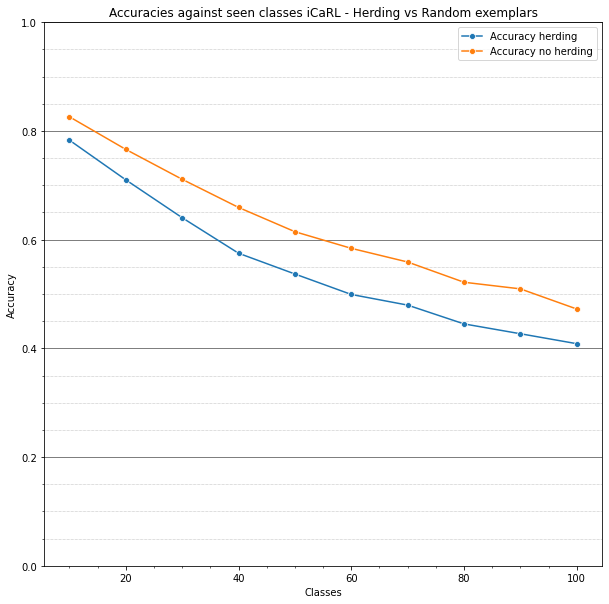

range(10, 110, 10)


In [24]:
# multiple lines on the same graph
# example: herding v no herding, same method different classifiers ...
import pandas as pd
import seaborn as sns

def multipleLinePlots(classes, acc1, acc2):
  classesAccuracies = list(zip(classes, acc1, acc2))
  dataClassesAccuracies = pd.DataFrame(classesAccuracies, columns = ['Classes', 'Accuracy herding', 'Accuracy no herding'])
  fig, ax1 = plt.subplots(figsize=(10,10), facecolor='white')
  ax1 = sns.lineplot(x="Classes", y="Accuracy herding", data=dataClassesAccuracies, marker = 'o')
  ax1 = sns.lineplot(x="Classes", y="Accuracy no herding", data=dataClassesAccuracies, marker = 'o')
  #ax1 = sns.lineplot(x="Steps", y="Cartoon accuracy", data=dataStepsAccuracies)
  ax1.legend(['Accuracy herding','Accuracy no herding'])
  ax1.set(xlabel='Classes', ylabel='Accuracy')
  plt.grid(axis='y',which='major', linestyle='-', linewidth='0.5', color='black') 
  plt.grid(axis='y',which='minor', linestyle=':', linewidth='0.5', color='grey')
  ax1.minorticks_on()
  plt.ylim(0, 1) 
  plt.title("Accuracies against seen classes iCaRL - Herding vs Random exemplars")
  plt.show()

classes = range(10,110,10)
multipleLinePlots(classes, listSeed1, listSeed2)

In [14]:
classes

['1',
 '0',
 '2',
 '0',
 '3',
 '0',
 '4',
 '0',
 '5',
 '0',
 '6',
 '0',
 '7',
 '0',
 '8',
 '0',
 '9',
 '0',
 '1',
 '0',
 '0']